In [2]:
%matplotlib notebook
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


# Simulacion de tres cuerpos

In [3]:
x,y,z,r,x1,x2,x3,y1,y2,y3,z1,z2,z3=sp.symbols('x,y,z,r,x1,x2,x3,y1,y2,y3,z1,z2,z3')# 
vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t,m_1,m_2,m_3=sp.symbols('vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t,m_1,m_2,m_3')# 

In [4]:
k=39.478
p1=sp.Matrix([x1,y1,z1])
p2=sp.Matrix([x2,y2,z2])
p3=sp.Matrix([x3,y3,z3])
v1=sp.Matrix([vx1,vy1,vz1])
v2=sp.Matrix([vx2,vy2,vz2])
v3=sp.Matrix([vx3,vy3,vz3])

In [3]:

F1


In [8]:
F2

Matrix([
[(3.9478*x1 - 3.9478*x2)/(Abs(x1 - x2)**2 + Abs(y1 - y2)**2 + Abs(z1 - z2)**2)**(3/2) - (3.9478*x2 - 3.9478*x3)/(Abs(x2 - x3)**2 + Abs(y2 - y3)**2 + Abs(z2 - z3)**2)**(3/2)],
[(3.9478*y1 - 3.9478*y2)/(Abs(x1 - x2)**2 + Abs(y1 - y2)**2 + Abs(z1 - z2)**2)**(3/2) - (3.9478*y2 - 3.9478*y3)/(Abs(x2 - x3)**2 + Abs(y2 - y3)**2 + Abs(z2 - z3)**2)**(3/2)],
[(3.9478*z1 - 3.9478*z2)/(Abs(x1 - x2)**2 + Abs(y1 - y2)**2 + Abs(z1 - z2)**2)**(3/2) - (3.9478*z2 - 3.9478*z3)/(Abs(x2 - x3)**2 + Abs(y2 - y3)**2 + Abs(z2 - z3)**2)**(3/2)]])

In [9]:
F3

Matrix([
[(3.9478*x1 - 3.9478*x3)/(Abs(x1 - x3)**2 + Abs(y1 - y3)**2 + Abs(z1 - z3)**2)**(3/2) - (-3.9478*x2 + 3.9478*x3)/(Abs(x2 - x3)**2 + Abs(y2 - y3)**2 + Abs(z2 - z3)**2)**(3/2)],
[(3.9478*y1 - 3.9478*y3)/(Abs(x1 - x3)**2 + Abs(y1 - y3)**2 + Abs(z1 - z3)**2)**(3/2) - (-3.9478*y2 + 3.9478*y3)/(Abs(x2 - x3)**2 + Abs(y2 - y3)**2 + Abs(z2 - z3)**2)**(3/2)],
[(3.9478*z1 - 3.9478*z3)/(Abs(x1 - x3)**2 + Abs(y1 - y3)**2 + Abs(z1 - z3)**2)**(3/2) - (-3.9478*z2 + 3.9478*z3)/(Abs(x2 - x3)**2 + Abs(y2 - y3)**2 + Abs(z2 - z3)**2)**(3/2)]])

# Runge Kutta 4to orden


In [4]:
def d2ydt2(y,f1,f2,f3,g1,g2,g3,h1,h2,h3):
    return np.array([y[9],
                     y[10],
                     y[11],
                     y[12],
                     y[13],
                     y[14],
                     y[15],
                     y[16],
                     y[17],
                     f1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     1])

def RK42(c1,c2,c3,dt,tf,F1,F2,F3,R,CV,M):
    #Vectorizcion de funciones
    f1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[0])
    f2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[1])
    f3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[2])
    g1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[0])
    g2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[1])
    g3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[2])
    h1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[0])
    h2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[1])
    h3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[2])
    ts=np.arange(0,tf,dt)
    TT=0#tiempo en completar orbita
    n=len(ts)
    ####################################Posiciones
    ys1=ts*0
    xs1=ts*0
    zs1=ts*0
    #
    ys2=ts*0
    xs2=ts*0
    zs2=ts*0
    #
    ys3=ts*0
    xs3=ts*0
    zs3=ts*0
    
    #####################################Velocidades
    vys1=ts*0
    vxs1=ts*0
    vzs1=ts*0
    #
    vys2=ts*0
    vxs2=ts*0
    vzs2=ts*0
    #
    vys3=ts*0
    vxs3=ts*0
    vzs3=ts*0
    ###########################3##aceleraciones
    ays1=ts*0
    axs1=ts*0
    azs1=ts*0
    #
    ays2=ts*0
    axs2=ts*0
    azs2=ts*0
    #
    ays3=ts*0
    axs3=ts*0
    azs3=ts*0
    #############Condiciones iniciales
    xs1[0]=c1[0]
    ys1[0]=c1[1]
    zs1[0]=c1[2]
    vxs1[0]=c1[3]
    vys1[0]=c1[4]
    vzs1[0]=c1[5]
    #############
    xs2[0]=c2[0]
    ys2[0]=c2[1]
    zs2[0]=c2[2]
    vxs2[0]=c2[3]
    vys2[0]=c2[4]
    vzs2[0]=c2[5]
    ###########
    xs3[0]=c3[0]
    ys3[0]=c3[1]
    zs3[0]=c3[2]
    vxs3[0]=c3[3]
    vys3[0]=c3[4]
    vzs3[0]=c3[5]
    
    for i in range(0,n-1):
        #Runge Kutta
        z0=np.array([xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i]])
        k1=d2ydt2(z0,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k2=d2ydt2(z0+(dt*k1)/2,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k3=d2ydt2(z0+(dt*k2)/2,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k4=d2ydt2(z0+dt*k3,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        
        #Vectores M1
        xs1[i+1]=xs1[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        ys1[i+1]=ys1[i]+(dt/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
        zs1[i+1]=zs1[i]+(dt/6)*(k1[6]+2*k2[6]+2*k3[6]+k4[6])
        vxs1[i+1]=vxs1[i]+(dt/6)*(k1[9]+2*k2[9]+2*k3[9]+k4[9])
        vys1[i+1]=vys1[i]+(dt/6)*(k1[12]+2*k2[12]+2*k3[12]+k4[12])
        vzs1[i+1]=vzs1[i]+(dt/6)*(k1[15]+2*k2[15]+2*k3[15]+k4[15])
         
        axs1[i]=f1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays1[i]=f2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs1[i]=f3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        #################Vectores M2
        xs2[i+1]=xs2[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        ys2[i+1]=ys2[i]+(dt/6)*(k1[4]+2*k2[4]+2*k3[4]+k4[4])
        zs2[i+1]=zs2[i]+(dt/6)*(k1[7]+2*k2[7]+2*k3[7]+k4[7])
        vxs2[i+1]=vxs2[i]+(dt/6)*(k1[10]+2*k2[10]+2*k3[10]+k4[10])
        vys2[i+1]=vys2[i]+(dt/6)*(k1[13]+2*k2[13]+2*k3[13]+k4[13])
        vzs2[i+1]=vzs2[i]+(dt/6)*(k1[16]+2*k2[16]+2*k3[16]+k4[16])
         
        axs2[i]=g1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays2[i]=g2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs2[i]=g3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        ###Vectores M3############################################
        
        xs3[i+1]=xs3[i]+(dt/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        ys3[i+1]=ys3[i]+(dt/6)*(k1[5]+2*k2[5]+2*k3[5]+k4[5])
        zs3[i+1]=zs3[i]+(dt/6)*(k1[8]+2*k2[8]+2*k3[8]+k4[8])
        vxs3[i+1]=vxs3[i]+(dt/6)*(k1[11]+2*k2[11]+2*k3[11]+k4[11])
        vys3[i+1]=vys3[i]+(dt/6)*(k1[14]+2*k2[14]+2*k3[14]+k4[14])
        vzs3[i+1]=vzs3[i]+(dt/6)*(k1[17]+2*k2[17]+2*k3[17]+k4[17])
         
        axs3[i]=h1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays3[i]=h2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs3[i]=h3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
       ########Graficas####################################
        
     ########################vectores relativos############################################
    if R==True:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        #fig2=plt.add(figsize=(10,10))
        #ax.scatter(0,0,0,color='yellow',s=30)
        ax.plot(xs1,ys1,zs1,color='yellow',label='Masa 1')
        ax.plot(xs2,ys2,zs2,color='blue',label='Masa 2')
        ax.plot(xs3,ys3,zs3,color='red',label='Masa 3')
        plt.xlabel('X')
        plt.ylabel('Y')
        #plt.axis('equal')
        
        #plt.plot(vxs,vys,color='blue',label='Velocidad x vs velocidad y')
        #plt.plot(axs,ays,color='red',label='Aceleracion x vs aceleracion y')
        if CV==True:  
            ll=50
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],axs[1:-1:ll],ays[1:-1:ll],color='red',label='Aceleracion')
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],vxs[1:-1:ll],vys[1:-1:ll],color='blue',label='Velocidad')
        plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    ####################Campos vectoriaels#########################################################
    
    if M==True:
    ##############################Magnitudes###################################
        fig3=plt.figure(figsize=(7,7))
        plt.plot(ts,np.sqrt(xs**2+ys**2),color='yellow',label='r vs tiempo')
        plt.plot(ts,np.sqrt(axs**2+ays**2),color='blue',label='aceleracion neta vs tiempo')
        plt.plot(ts,np.sqrt(vxs**2+vys**2),color='red',label='Velocidad neta vs tiempo')
        #plt.plot(ts,vxs,color='red',label='Velocidad')
        #plt.plot(ts,axs,color='blue',label='aceleracion')
        plt.ylabel('Unidades Atronomicas UA')
        plt.xlabel('tiempo(años)')
        #plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    return xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts

# Caso Arbitrario

In [5]:

m1=1.5/10# Sol
m2= 2.5/10#333030 #Tierra
m3=3.2/10#3.69432e-8#Luna


F1=(-k*m2*(p1-p2)/(p1-p2).norm()**(3)-k*m3*(p1-p3)/(p1-p3).norm()**(3))*(m1/m1)
F2=(-k*m1*(p2-p1)/(p2-p1).norm()**(3)-k*m3*(p2-p3)/(p2-p3).norm()**(3))*(m2/m2)
F3=(-k*m1*(p3-p1)/(p3-p1).norm()**(3)-k*m2*(p3-p2)/(p3-p2).norm()**(3))*(m3/m3)


In [6]:
F1

Matrix([
[(-9.8695*x1 + 9.8695*x2)/(Abs(x1 - x2)**2 + Abs(y1 - y2)**2 + Abs(z1 - z2)**2)**(3/2) - (12.63296*x1 - 12.63296*x3)/(Abs(x1 - x3)**2 + Abs(y1 - y3)**2 + Abs(z1 - z3)**2)**(3/2)],
[(-9.8695*y1 + 9.8695*y2)/(Abs(x1 - x2)**2 + Abs(y1 - y2)**2 + Abs(z1 - z2)**2)**(3/2) - (12.63296*y1 - 12.63296*y3)/(Abs(x1 - x3)**2 + Abs(y1 - y3)**2 + Abs(z1 - z3)**2)**(3/2)],
[(-9.8695*z1 + 9.8695*z2)/(Abs(x1 - x2)**2 + Abs(y1 - y2)**2 + Abs(z1 - z2)**2)**(3/2) - (12.63296*z1 - 12.63296*z3)/(Abs(x1 - x3)**2 + Abs(y1 - y3)**2 + Abs(z1 - z3)**2)**(3/2)]])

<IPython.core.display.Javascript object>


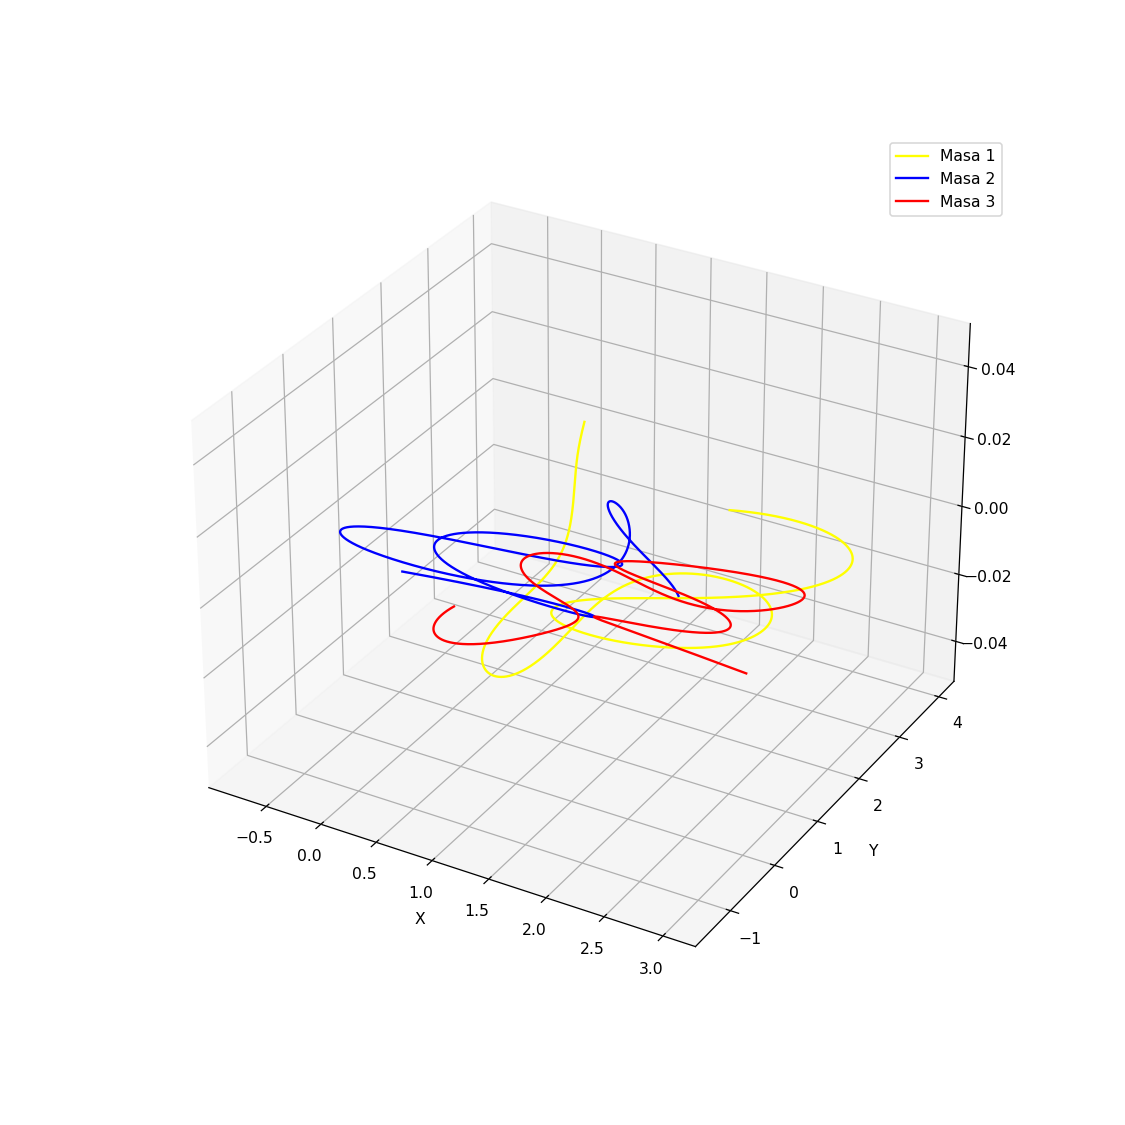

In [8]:


MM1=np.array([0,4,0,0,0,0])
MM2=np.array([0,0,0,0,0,0])
MM3=np.array([3,0,0,0,0,0])
xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,0.00001,8,F1,F2,F3,True,False,False) # RK42(y0,x0,,z0,vx0,vy0,vz0,dt,tf,Fx,Fy,Fz,VecR,Cam_vect,Magnt)

# Velocidad Centro de masa

In [204]:
VX=vx1*m_1+vx2*m_2+vx3*m_3#xs1*m1+xs2*m2+xs3*m3
VY=vy1*m_1+vy2*m_2+vy3*m_3#ys1*m1+ys2*m2+ys3*m3
VZ=vz1*m_1+vz2*m_2+vz3*m_3#zs1*m1+zs2*m2+zs3*m3
M=m_1+m_2+m_3
VM=sp.Matrix([VX,VY,VZ])*(1/M)

vx11=sp.lambdify([vx1,vx2,vx3,m_1,m_2,m_3],VM[0])
vy11=sp.lambdify([vy1,vy2,vy3,m_1,m_2,m_3],VM[1])
vz11=sp.lambdify([vz1,vz2,vz3,m_1,m_2,m_3],VM[2])

<IPython.core.display.Javascript object>


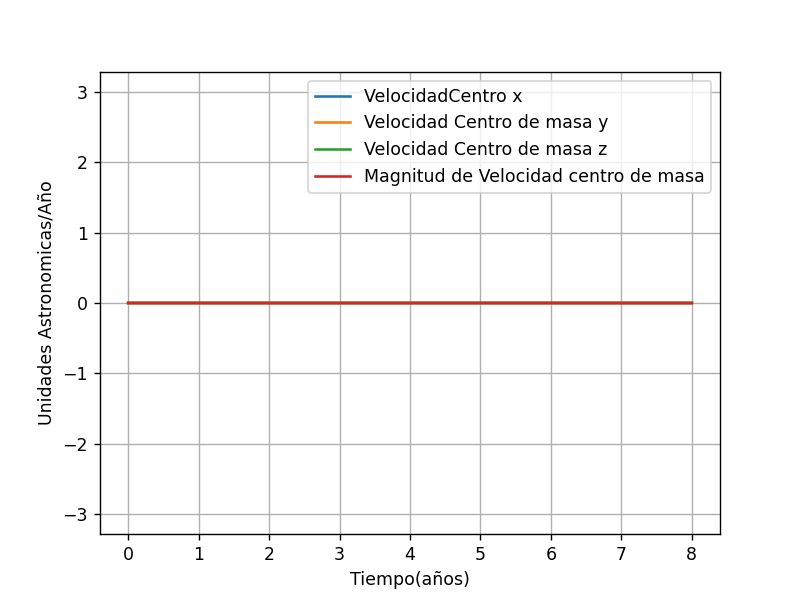

(-0.39999950000000006,
 8.3999895,
 -5.1164942487929194e-14,
 8.559431211857843e-14)

In [205]:
fig2=plt.figure()
vxx=vx11(vxs1,vxs2,vxs3,m1,m2,m3)
vyy=vy11(vys1,vys2,vys3,m1,m2,m3)
vzz=vz11(vzs1,vzs2,vzs3,m1,m2,m3)
plt.plot(ts,vxx,label='VelocidadCentro x')
plt.plot(ts,vyy,label='Velocidad Centro de masa y')
plt.plot(ts,vzz,label='Velocidad Centro de masa z')
plt.plot(ts,np.sqrt(vxx**2+vyy**2+vzz**2),label='Magnitud de Velocidad centro de masa')
#plt.ylim([-0.5,0.5])
plt.legend()
plt.ylabel('Unidades Astronomicas/Año')
plt.xlabel('Tiempo(años)')
plt.grid('on')
plt.axis('equal')

In [43]:
np.sqrt(vxx**2+vyy**2+vzz**2)[-100000]-np.sqrt(vxx**2+vyy**2+vzz**2)[0]

7.388945199675211e-14

# Centro de Masa

In [14]:
CX=x1*m_1+x2*m_2+x3*m_3#xs1*m1+xs2*m2+xs3*m3
CY=y1*m_1+y2*m_2+y3*m_3#ys1*m1+ys2*m2+ys3*m3
CZ=z1*m_1+z2*m_2+z3*m_3#zs1*m1+zs2*m2+zs3*m3
M=m_1+m_2+m_3
CM=sp.Matrix([CX,CY,CZ])*(1/M)

cx1=sp.lambdify([x1,x2,x3,m_1,m_2,m_3],CM[0])
cy1=sp.lambdify([y1,y2,y3,m_1,m_2,m_3],CM[1])
cz1=sp.lambdify([z1,z2,z3,m_1,m_2,m_3],CM[2])


<IPython.core.display.Javascript object>


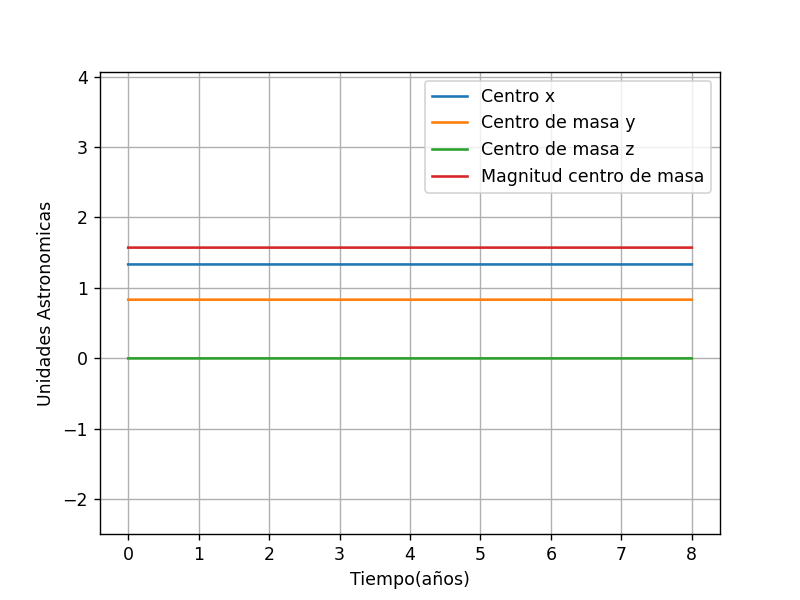

(-0.39999950000000006, 8.3999895, -0.07861650943381412, 1.6509466981100964)

In [207]:
fig2=plt.figure()
cxx=cx1(xs1,xs2,xs3,m1,m2,m3)
cyy=cy1(ys1,ys2,ys3,m1,m2,m3)
czz=cz1(zs1,zs2,zs3,m1,m2,m3)
plt.plot(ts,cxx,label='Centro x')
plt.plot(ts,cyy,label='Centro de masa y')
plt.plot(ts,czz,label='Centro de masa z')
plt.plot(ts,np.sqrt(cxx**2+cyy**2+czz**2),label='Magnitud centro de masa')
plt.legend()
plt.ylabel('Unidades Astronomicas')
plt.xlabel('Tiempo(años)')
plt.grid('on')
plt.axis('equal')

# Puntos de Lagrange

In [15]:
r1=(p1-CM).subs(z1,0).subs(z2,0).subs(z3,0)
r2=(p2-CM).subs(z1,0).subs(z2,0).subs(z3,0)
a=r1+r2


L1=a.norm()*(1-((m_2/(3*m_1))**(1/3)))*(a.subs(z2,0)/a.subs(z2,0).norm())
L1x1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L1[0])
L1y1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L1[1])


L2=r2.norm()*(1+(m_2/(3*m_1))**(1/3))*(a.subs(z2,0)/a.subs(z2,0).norm())
L2x1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L2[0])
L2y1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L2[1])


#L4x=(r2.norm()/2)*((m1-m2)/(m1+m2))
#L4y=(sp.sqrt(3)/2)*r2.norm()
#L4x=sp.lambdify([x1,x2,x3,y1,y2,y3],L4x)
#L4y=sp.lambdify([x1,x2,x3,y1,y2,y3],L4y)

#L4x=sp.Matrix([(x1-2*CX+x2)*((m1-m2)/(m1+m2)),,0])
o=sp.pi/3
oo=(a.subs(z2,0)/a.subs(z2,0).norm())
spp=oo[1]*sp.cos(o)+oo[0]*sp.sin(o)
cpp=oo[0]*sp.cos(o)-oo[1]*sp.sin(o)

L4=sp.Matrix([a.norm()*((m_1-m_2)/(m_1+m_2))*cpp,a.norm()*spp,0])
L4=(r2.norm()/2)*sp.sqrt(((m_1-m_2)/(m_1+m_2))**2+3)*sp.Matrix([cpp,spp,0])
L4x1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L4[0])
L4y1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L4[1])



###L5
o=-sp.pi/3
oo=(a.subs(z2,0)/a.subs(z2,0).norm())
spp=oo[1]*sp.cos(o)+oo[0]*sp.sin(o)
cpp=oo[0]*sp.cos(o)-oo[1]*sp.sin(o)
L5=(a.norm()/2)*sp.sqrt(((m_1-m_2)/(m_1+m_2))**2+3)*sp.Matrix([cpp,spp,0])
L5x1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L5[0])
L5y1=sp.lambdify([x1,x2,x3,y1,y2,y3,m_1,m_2,m_3],L5[1])



#L4y=r2.norm()/2*((m1-m2)/(m1+m2))

#L1x=

<IPython.core.display.Javascript object>


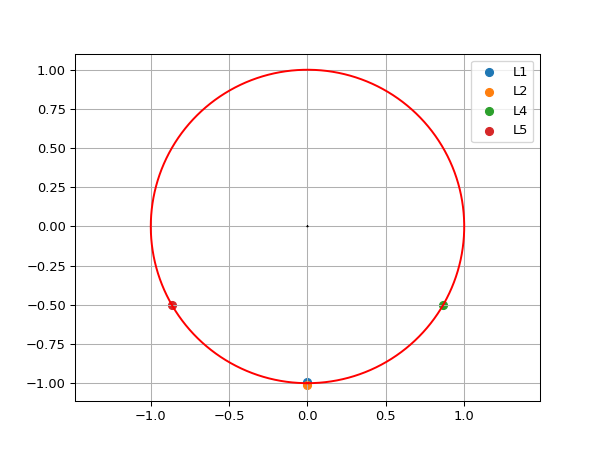

In [100]:
fig6=plt.figure()
b=0
plt.axis('equal')
plt.grid('on')
plt.scatter(L1x[b],L1y[b],label='L1')
plt.scatter(L2x[b],L2y[b],label='L2')
plt.scatter(L4x[b],L4y[b],label='L4')
plt.scatter(L5x[b],L5y[b],label='L5')
#plt.plot(cx+L4x,cy+L4y,color='blue')
#plt.plot(ts,LL)
LL=np.sqrt(L4x**2+L4y**2)
plt.plot(xs2,ys2,color='red')
plt.plot(xs1,ys1,color='black')
plt.legend()
#plt.plot(L4x,L4y)
#plt.plot(L5x,L5y)

#plt.scatter(L1x-xs2,L1y-ys2)

# conservacion de la energía
$$T_1=\frac{1}{2}m_1(\dot x_1^2+\dot y_1^2+\dot z_1^2)$$
$$U_1=\frac{km_1}{r_1}$$

<IPython.core.display.Javascript object>


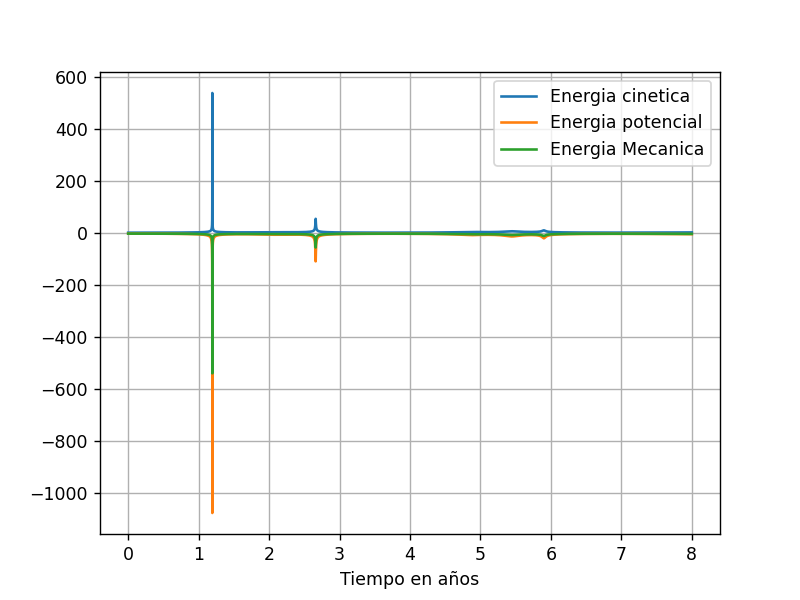

In [208]:
fig6=plt.figure()
T1=(1/2)*m1*(vxs1**2+vys1**2+vzs1**2)
T2=(1/2)*m2*(vxs2**2+vys2**2+vzs2**2)
T3=(1/2)*m3*(vxs3**2+vys3**2+vzs3**2)
T=T1+T2+T3
U1=-k*m1*(m2/((p1-p2).norm())+(m3/((p1-p3).norm())))
U2=-k*m2*(m1/((p2-p1).norm())+m3/((p2-p3).norm()))
U3=-k*m3*(m2/((p3-p2).norm())+m1/((p3-p1).norm()))
#U1=-k*m1/np.sqrt(xs1**2+ys1**2+zs1**2)
#U2=-k*m2/np.sqrt(xs2**2+ys2**2+zs2**2)
#U3=-k*m3/np.sqrt(xs3**2+ys3**2+zs3**2)
U=U1+U2+U3
UUU=U3+U1+U2
UU=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3],UUU)
U=UU(xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3)
plt.plot(ts,T,label='Energia cinetica')
plt.plot(ts,U,label='Energia potencial')
plt.xlabel('Tiempo en años')
plt.plot(ts,T+U,label='Energia Mecanica')

#plt.axis('equal')
#plt.ylim(-1,1)
plt.grid('on')
plt.legend()
###
#r1=sp.sqrt((x-x1)**2+(y-y1)**2+(z-z1)**2)
#r2=sp.sqrt((x-x2)**2+(y-y2)**2+(z-z2)**2)
#r3=sp.sqrt((x3-x)**2+(y3-y)**2+(z3-z)**2)
#L1=p1.cross(m1*v1).norm()
#L2=p2.cross(m2*v2).norm()
#L3=p3.cross(m3*v3).norm()
#U11=-k/r1
#U22=-k/r2
#U33=-k/r3
#UU1=sp.lambdify([x,y,z,x1,y1,z1,vx1,vy1,vz1],U11+L1/(2*m1*r1**2))
#UU2=sp.lambdify([x,y,z,x2,y2,z2,vx2,vy2,vz2],U22+L2/(2*m2*r2**2))
#UU3=sp.lambdify([x,y,z,x3,y3,z3,vx3,vy3,vz3],U33+L3/(2*m3*r3**2))

$$U=\frac{km_i}{r_i}$$

<IPython.core.display.Javascript object>


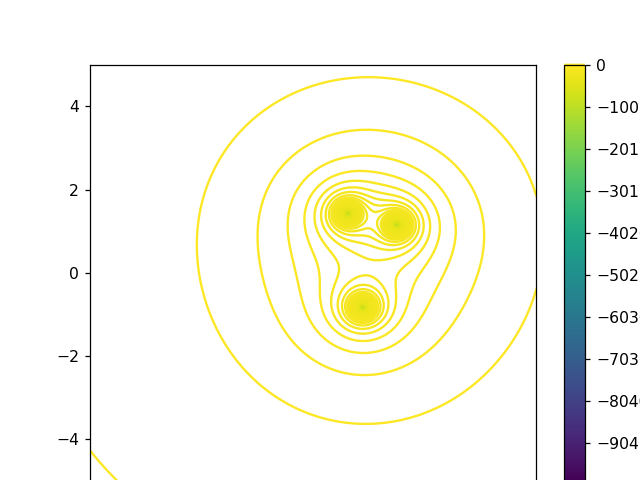

In [628]:
fig32=plt.figure()
xxs=np.linspace(-5,5,1000)
X,Y=np.meshgrid(xxs,xxs)
tss=-1
Z=UU2(X,Y,0,xs2[tss],ys2[tss],zs2[tss],vxs1[tss],vys1[tss],vzs1[tss])+UU3(X,Y,0,xs3[tss],ys3[tss],zs3[tss],0,0,0)+UU1(X,Y,0,xs1[tss],ys1[tss],zs1[tss],vxs3[tss],vys3[tss],vzs3[tss])

cm=plt.contour(X,Y,Z,levels=700)
plt.colorbar(cm)

# Sistema Sol,jupyter,asteroide

In [21]:
k1=k
m1=1# Sol
m2= 0.000954588 #jupyter
m3=0.000000000000000000000008#
F1=(-k*m2*(p1-p2)/(p1-p2).norm()**(3)-k*m3*(p1-p3)/(p1-p3).norm()**(3))*(m1/m1)*(k1/k)
F2=(-k*m1*(p2-p1)/(p2-p1).norm()**(3)-k*m3*(p2-p3)/(p2-p3).norm()**(3))*(m2/m2)*(k1/k)
F3=(-k*m1*(p3-p1)/(p3-p1).norm()**(3)-k*m2*(p3-p2)/(p3-p2).norm()**(3))*(m3/m3)*(k1/k)

In [22]:
MM1=np.array([0,0,0,0,0,0])
MM2=np.array([0,-4.6433,0,2.75312,0,0])
MM3=np.array([0,-4.7,0.2,2.9,0,0])
dt=0.00002
tf=12

<IPython.core.display.Javascript object>


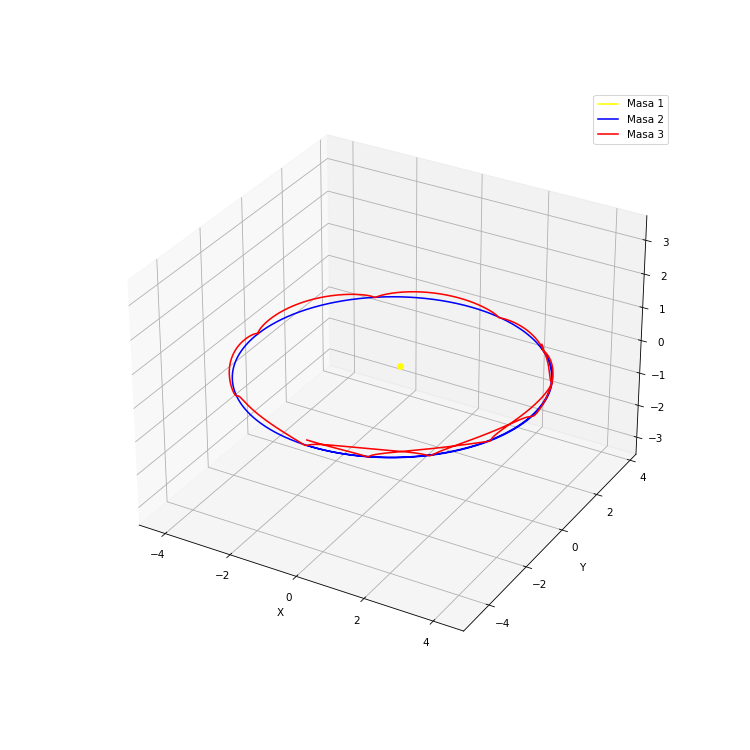

In [24]:

xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,dt,tf,F1,F2,F3,True,False,False)

# SOL, tierra, satelite

In [9]:
ss=1
k1=k*ss
m1=1 # Sol
m2=3.00273e-6 #tierra
m3=3.165105302e-27 #James webb telescope
F1=(-k*m2*(p1-p2)/(p1-p2).norm()**(3)-k*m3*(p1-p3)/(p1-p3).norm()**(3))*(m1/m1)*(k1/k)
F2=(-k*m1*(p2-p1)/(p2-p1).norm()**(3)-k*m3*(p2-p3)/(p2-p3).norm()**(3))*(m2/m2)*(k1/k)
F3=(-k*m1*(p3-p1)/(p3-p1).norm()**(3)-k*m2*(p3-p2)/(p3-p2).norm()**(3))*(m3/m3)*(k1/k)

In [10]:
MM1=np.array([0,0,0,0,0,0])*ss
MM2=np.array([0,-1,0,6.282,0,0])*ss
MM3=np.array([0,-1.3,0,6.3,0,0])*ss
dt=0.0001
tf=1


<IPython.core.display.Javascript object>


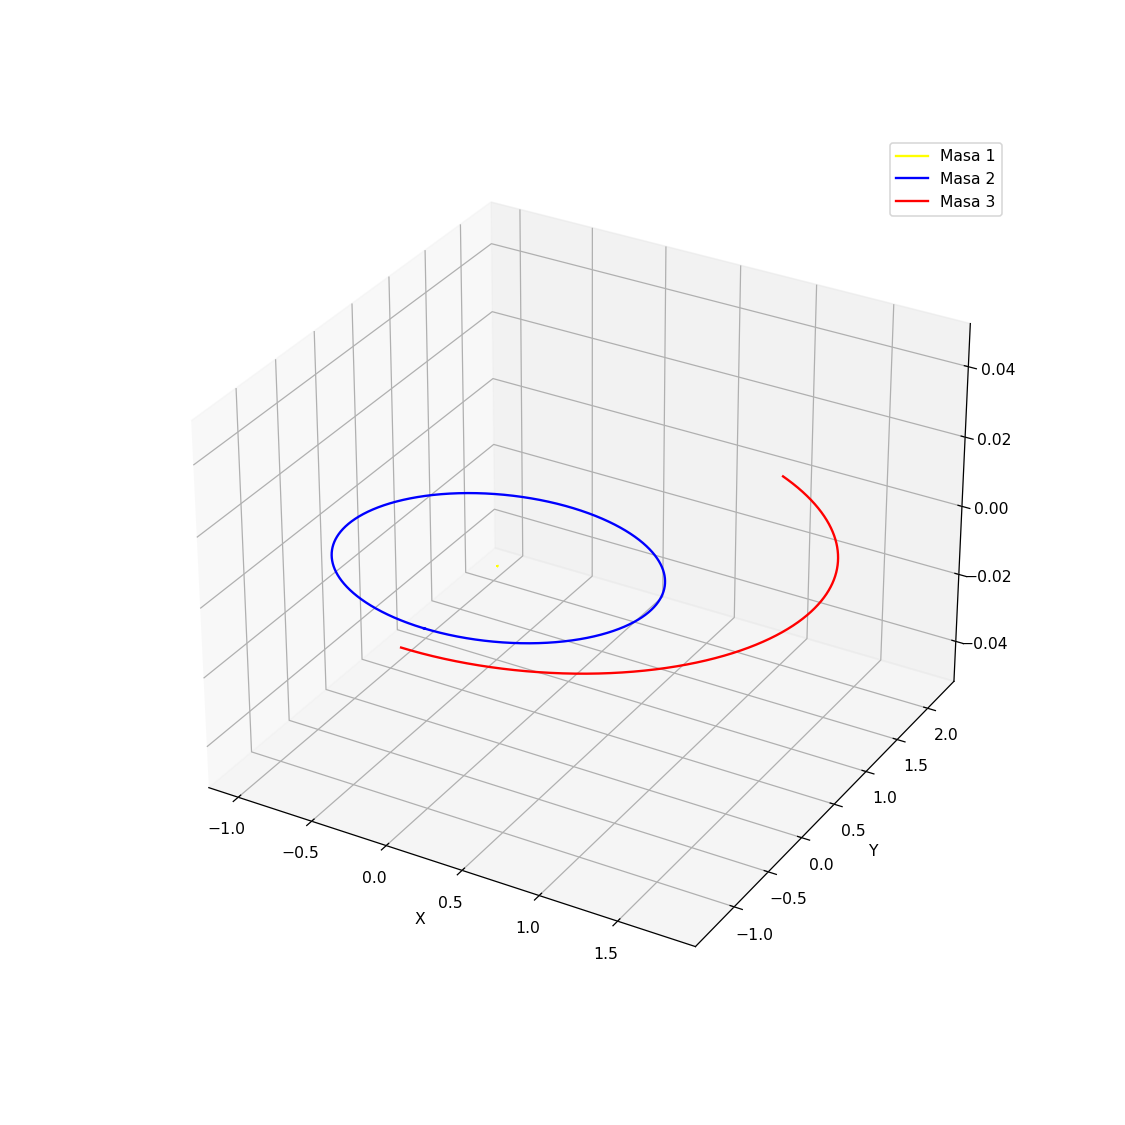

In [16]:
xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,dt,tf,F1,F2,F3,True,False,False)
cx=cx1(xs1,xs2,xs3,m1,m2,m3)
cy=cy1(ys1,ys2,ys3,m1,m2,m3)
cz=cz1(zs1,zs2,zs3,m1,m2,m3)

L1x=L1x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L1y=L1y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

L2y=L2y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L2x=L2x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

L4x=L4x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L4y=L4y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

L5x=L5x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L5y=L5y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

# Punto de lagrange L2

In [25]:
MM2=np.array([0,-1,0,6.282,0,0])
MM3=np.array([cx[0]+L2x[0],cy[0]+L2y[0],0,6.282,0,0])
dt=0.0001
tf=1

<IPython.core.display.Javascript object>


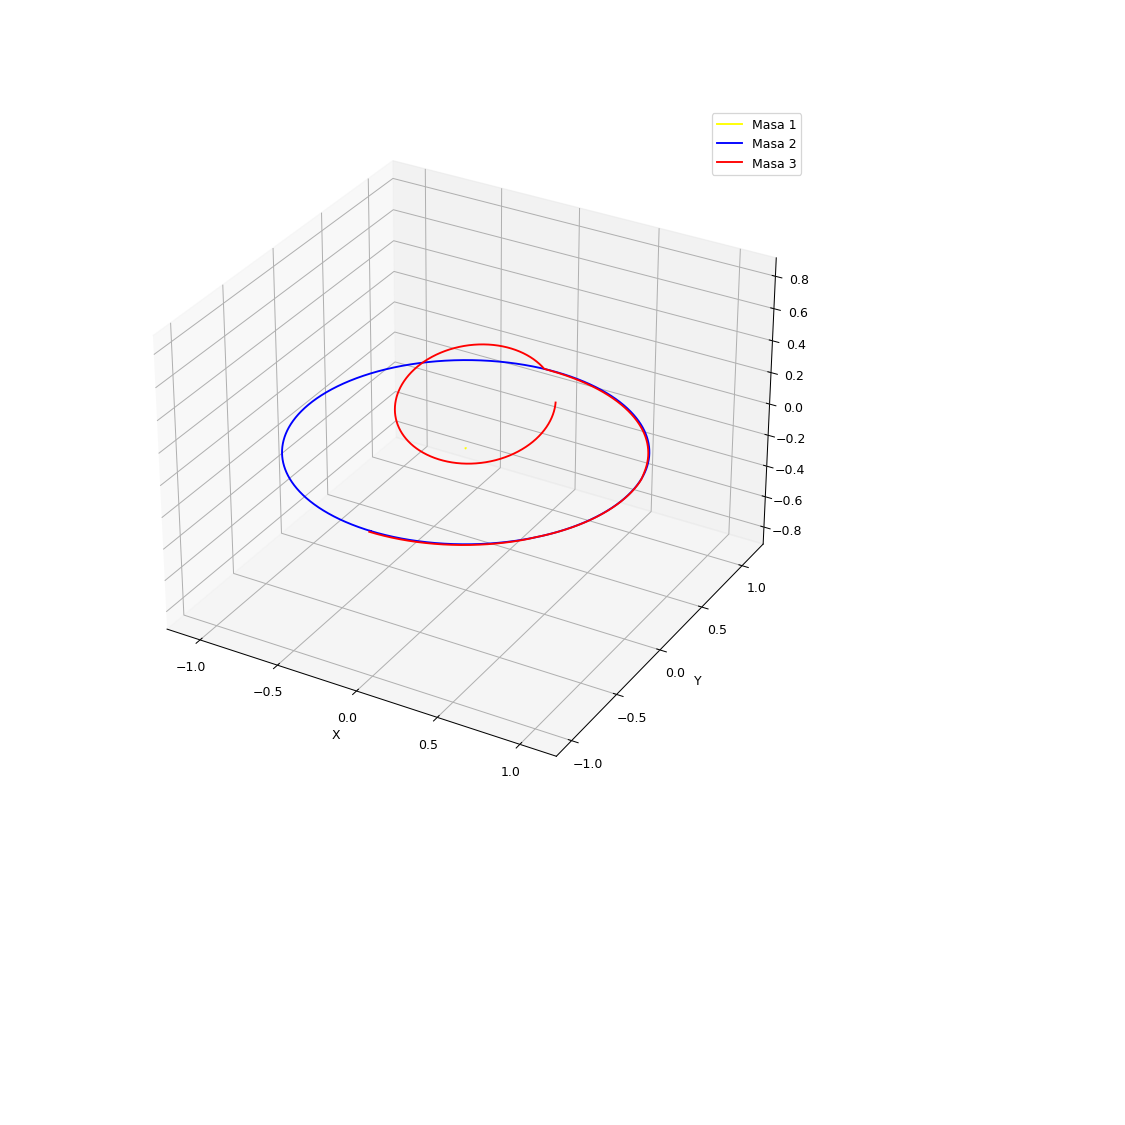

In [26]:
xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,dt,tf,F1,F2,F3,True,False,False)
cx=cx1(xs1,xs2,xs3,m1,m2,m3)
cy=cy1(ys1,ys2,ys3,m1,m2,m3)
cz=cz1(zs1,zs2,zs3,m1,m2,m3)

L1x=L1x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L1y=L1y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

L2y=L2y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L2x=L2x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

L4x=L4x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L4y=L4y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

L5x=L5x1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)
L5y=L5y1(xs1,xs2,xs3,ys1,ys2,ys3,m1,m2,m3)

# Punto de estabilidad L4

<IPython.core.display.Javascript object>


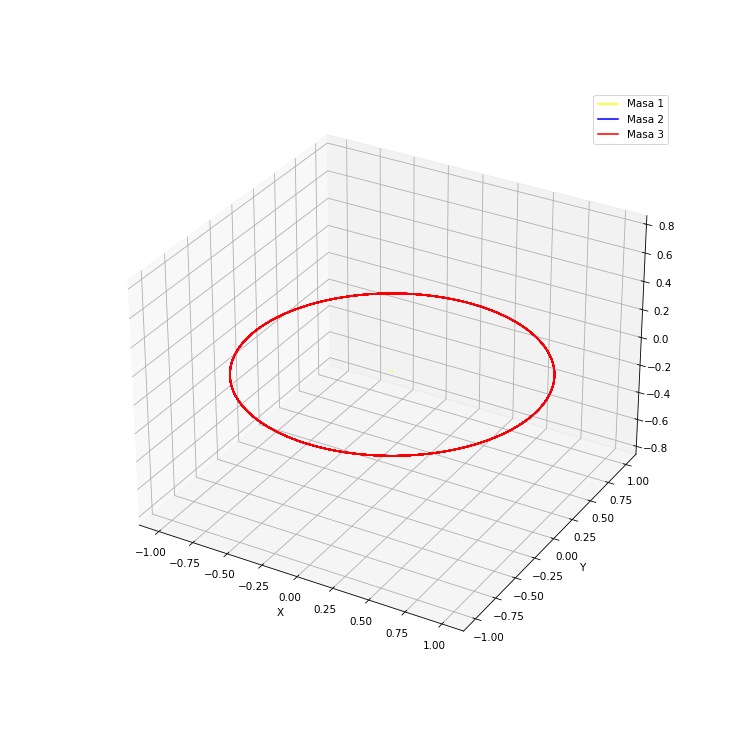

In [55]:
MM2=np.array([0,-1,0,6.282,0,0])*ss
MM3=np.array([cx[0]+L4x[0],cy[0]+L4y[0],0,3.141,5.44,0])*ss
dt=0.0001
tf=1
xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK42(MM1,MM2,MM3,dt,tf,F1,F2,F3,True,False,False)

# Punto de estabilidad L5

<IPython.core.display.Javascript object>


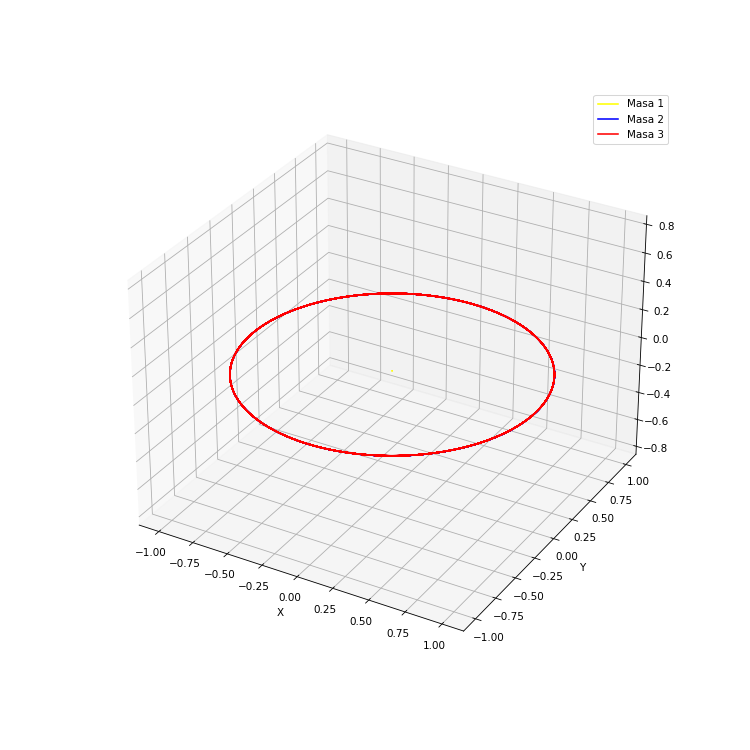

In [57]:
MM2=np.array([0,-1,0,6.282,0,0])*ss
MM3=np.array([cx[0]+L5x[0],cy[0]+L5y[0],0,3.141,-5.44,0])*ss
dt=0.0001
tf=1
xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK42(MM1,MM2,MM3,dt,tf,F1,F2,F3,True,False,False)

In [ ]:
fig25=plt.figure()
plt.plot(ts,np.sqrt(L2x**2+L2y**2),label='Magnitud de L2')
plt.axis('equal')
plt.grid('on')
plt.legend()
plt.title('Magnitud de L2(Au) vs tiempo(AÑOS)')
plt.xlabel('tiempo (años)')

# James Webb 

In [353]:
MM2=np.array([0,-1,0,6.282,0,0])
MM3=np.array([cx[0]+L2x[0],cy[0]+L2y[0],0.005,6.282+0.064,0,0])
dt=0.00001
tf=1


In [24]:
MM2=np.array([0,-1,0,6.281,0,0])
MM3=np.array([cx[0]+L2x[0],cy[0]+L2y[0],-0.00645,6.281,0,0])
dt=0.00001
tf=5

In [22]:
MM2=np.array([0,-1,0,6.281,0,0])
MM3=np.array([cx[0]+L2x[0],cy[0]+L2y[0],0.003,6.281+0.047,0,0])
dt=0.00001
tf=5

<IPython.core.display.Javascript object>


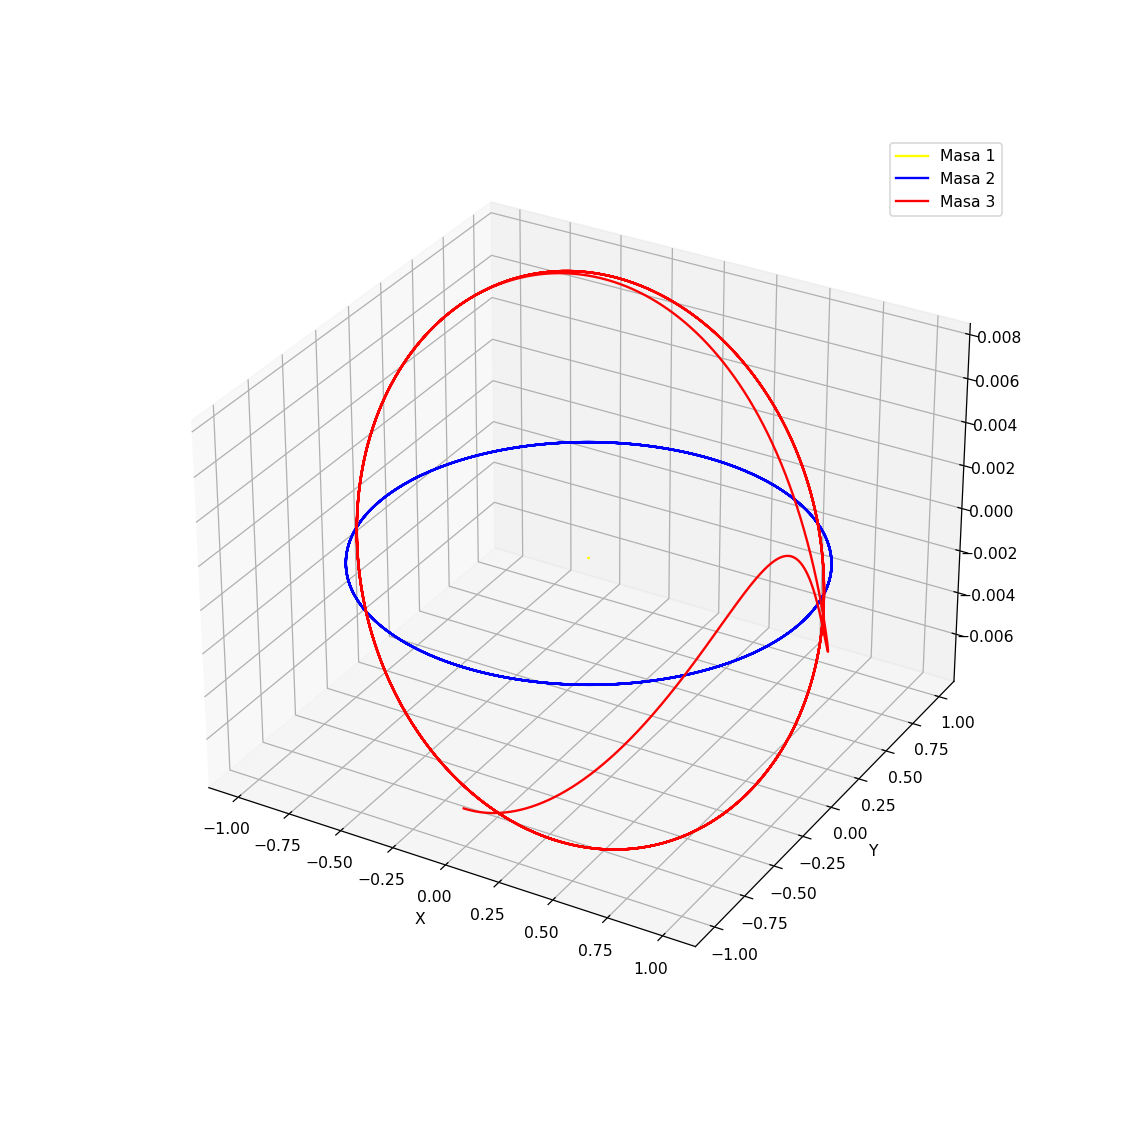

In [25]:
xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,dt,tf,F1,F2,F3,True,False,False)

# Metodo de Disparo

In [173]:
nn=5
cc1=np.linspace(0,9,nn)
cc2=np.linspace(0,0.003,nn)
CC1,CC2=np.meshgrid(cc1,cc2)
E=CC1*0
tol=1/100
dt=0.0005
tf=1/2
for j in range(nn):
    for i in range(nn):
        MM3=np.array([cx[0]+L2x[0],cy[0]+L2y[0],CC2[j,i],CC1[j,i],0,0])
        xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,dt,tf,F1,F2,F3,False,False,False)
        E[j,i]=np.sqrt(abs(xs3[0]-xs3[-1])**2+abs(ys3[0]-ys3[-1])**2+abs(zs3[0]-zs3[-1])**2)
        #if (abs(xs3[0]-xs3[-1])<tol and abs(ys3[0]-ys3[-1])<tol and abs(zs3[0]-zs3[-1])<tol):
         #   CC1=i
          #  CC2=j
          #  i=nn
           # j=nn
           # break
        

<IPython.core.display.Javascript object>


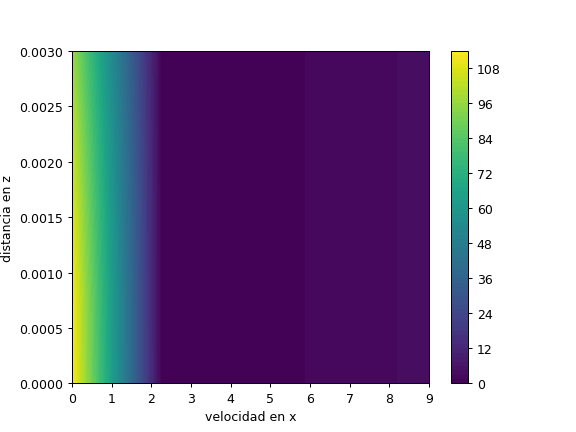

In [179]:
fig55=plt.figure()
cm=plt.contourf(CC1,CC2,E,levels=100)
plt.xlabel('velocidad en x')
plt.ylabel('distancia en z')
plt.colorbar(cm)

In [239]:
nn=50
cc1=np.linspace(0,2,nn)
cc2=np.linspace(0.001,0.007,nn)
tol=1/100
dt=0.0001
tf=1/2
ex=cc1*0
ey=cc1*0
ez=cc1*0
for i in range(nn):
    MM3=np.array([cx[0]+L2x[0],cy[0]+L2y[0],cc2[i],0,0,0])
    xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts=RK5(MM1,MM2,MM3,dt,tf,F1,F2,F3,False,False,False)
    ex[i]=abs(xs3[0]-xs3[-1])
    ey[i]=abs(ys3[0]-ys3[-1])
    ez[i]=abs(zs3[0]-zs3[-1])
    if abs(xs3[0]-xs3[-1])<tol and abs(ys3[0]-ys3[-1])<tol and abs(zs3[0]-zs3[-1])<tol:
        CC1=cc1(i)
        i=nn
        break

<IPython.core.display.Javascript object>


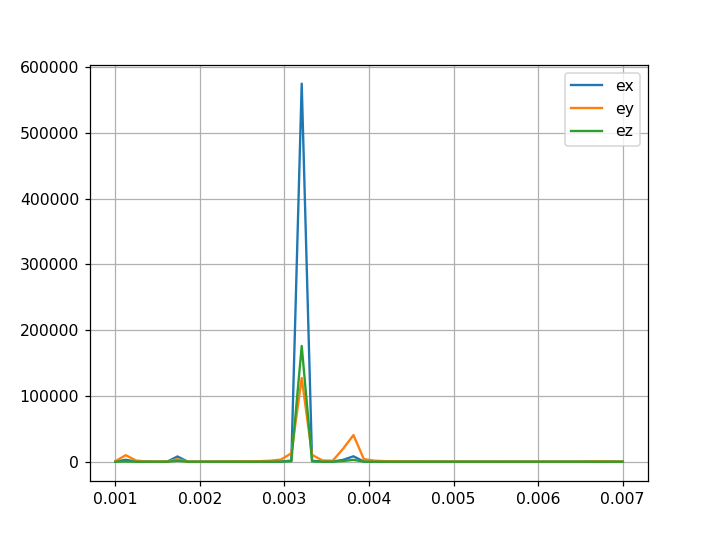

In [243]:
fig32=plt.figure()
plt.plot(cc2,ex,label='ex')
plt.plot(cc2,ey,label='ey')
plt.plot(cc2,ez,label='ez')
#plt.plot(cc1,np.sqrt(ex**2+ey**2+ez**2),label='mag')
plt.grid('on')
plt.legend()

In [244]:
min(np.sqrt(ex**2+ey**2+ez**2))

27.859738860128726

# Animacion 2d

<IPython.core.display.Javascript object>


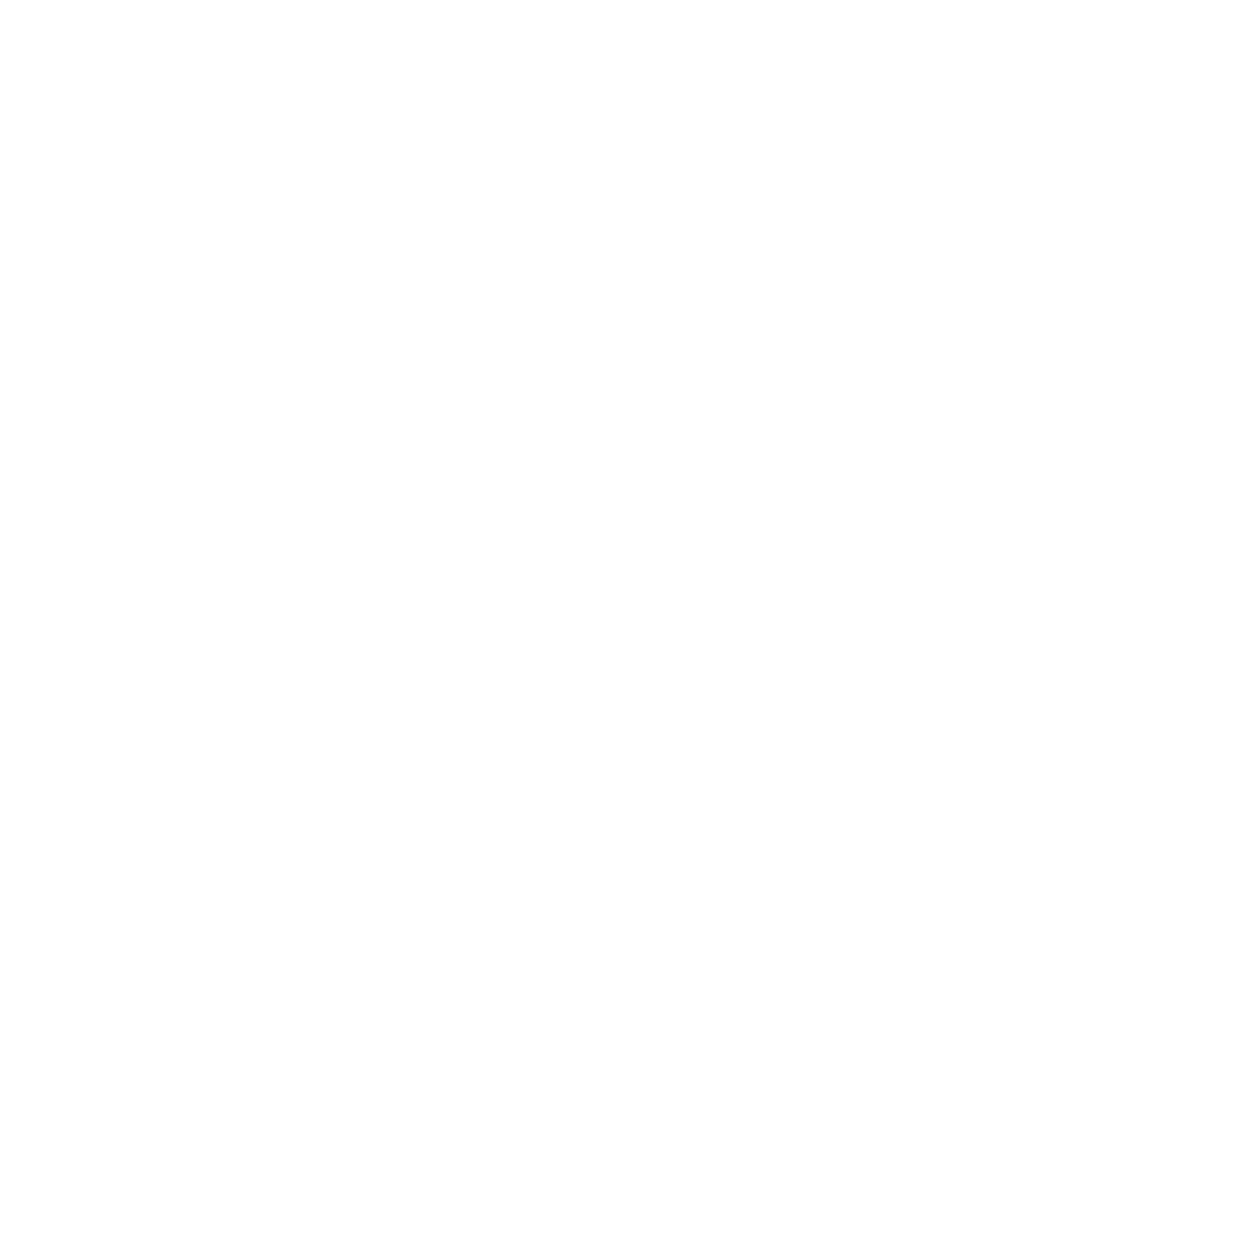

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\arif\appdata\local\programs\python\python39\lib\site-packages\matplotlib\quiver.py:658: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\users\arif\appdata\local\programs\python\python39\lib\site-packages\matplotlib\quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


C:\Users\Arif\AppData\Local\Temp\ipykernel_5724\2275789233.py:63: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


In [211]:
fig3 = plt.figure(figsize=(10,10))
fx = fig3.add_subplot(111)
fx.set_facecolor('black')
plt.axis('off')

nn=len(xs1)
xx=np.concatenate((xs1,xs2,xs3))
yy=np.concatenate((ys1,ys2,ys3))
plt.grid('on')
plt.axis('equal')
ii=1/3
plt.xlim([min(xx)-ii, max(xx)+ii])
plt.ylim([min(yy)-ii, max(yy)+ii])



#resorte,=plt.plot([],[],color='black', label='trayectoria')
#plt.scatter(0,0,color='red')
#Q=plt.quiver(xs,ys,axs,ays)
#pp,=plt.plot([],[],'bo',label='Astro')
#plt.axis('equal')
plt.legend()

n=200

def animate(i):
    fx.clear()
    #plt.axis('off')
    plt.axis('equal')
    plt.xlim([min(xx)-ii, max(xx)+ii])
    plt.ylim([min(yy)-ii, max(yy)+ii])
    
    ss=60
    fx.scatter(xs1[i-1],ys1[i-1],color='yellow',label='Masa1',s=ss)
    fx.plot(xs1[:i],ys1[:i],color='yellow')
    fx.quiver(xs1[i-1],ys1[i-1],axs1[i-1],ays1[i-1],color='yellow')
    
    
    fx.scatter(xs2[i-1],ys2[i-1],color='blue',label='Masa2',s=ss)
    fx.plot(xs2[:i],ys2[:i],color='blue',lw=1)
    fx.quiver(xs2[i-1],ys2[i-1],axs2[i-1],ays2[i-1],color='blue')
    
    fx.scatter(xs3[i-1],ys3[i-1],color='red',label='Masa 3',s=ss)
    fx.plot(xs3[:i],ys3[:i],color='red',lw=1)
    fx.quiver(xs3[i-1],ys3[i-1],axs3[i-1],ays3[i-1],color='red')
    
    ##Puntos de Lagrange
    Ls=40
    #fx.scatter((cx+L1x)[i-1],(cy+L1y)[i-1],color='white',label='L1',s=Ls)
    #fx.scatter((cx+L2x)[i-1],(cy+L2y)[i-1],color='white',label='L2',s=Ls)
    #fx.scatter(L4x[i-1],L4y[i-1],color='white',label='L4',s=Ls)
    #fx.scatter((L5x)[i-1],(L5y)[i-1],color='white',label='L5',s=Ls)
    
    plt.legend()
    return fig3
    

fr=np.linspace(0,len(ts),n,dtype=int)
anim=FuncAnimation(fig3,animate,frames=fr,interval=20)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

# Animacion 3D

<IPython.core.display.Javascript object>


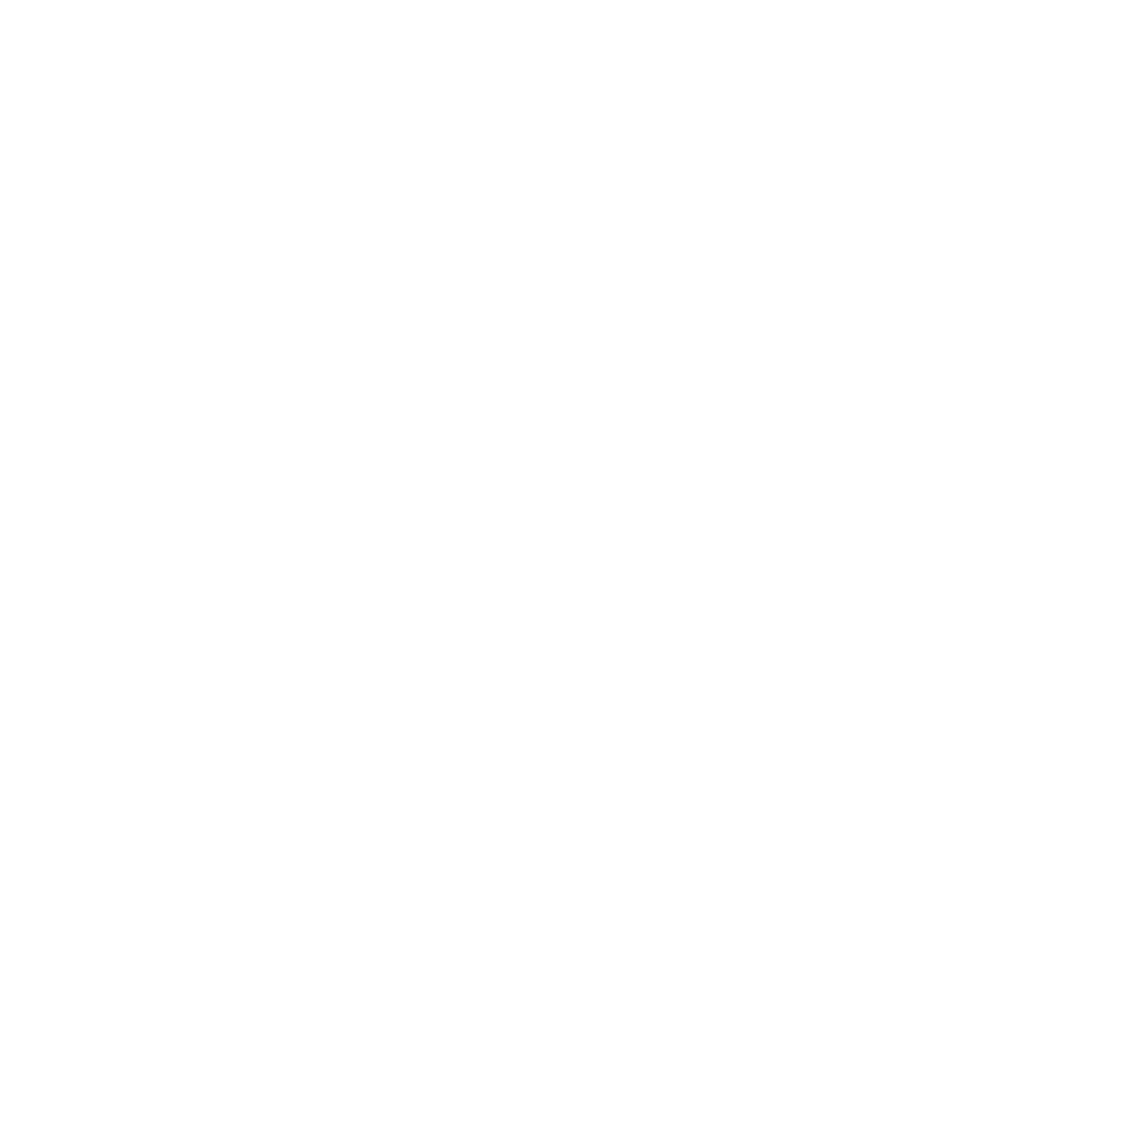

C:\Users\Arif\AppData\Local\Temp\ipykernel_13104\817327584.py:73: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


In [26]:
fig10 = plt.figure(figsize=(10,10))
bx = fig10.add_subplot(111, projection='3d')

#bx.set_facecolor('black')
plt.axis('equal')
plt.axis('on')
nn=len(xs1)
pch=10
xx=np.concatenate((xs1,xs2,xs3))
yy=np.concatenate((ys1,ys2,ys3))
zz=np.concatenate((zs1,zs2,zs3))
bx.set_xlim3d([min(xx)-min(xx)/pch, max(xx)+max(xx)/pch])
bx.set_ylim3d([min(yy)-min(yy)/pch, max(yy)+max(yy)/pch])
bx.set_zlim3d([min(zz)-min(zz)/pch, max(zz)+max(zz)/pch])
bx.view_init(elev=20, azim=45)

n=100

#orbita=ax.plot([],[],[],color='black', label='trayectoria')

#astro,=ax.plot3D([],[],[],'ro',label='Astro')
#astro, = ax.plot([xs],[ys],[ys],'ro',label='Astro')
#orbita, = ax.plot([], [], [], lw=2,color='black', label='trayectoria')

def animate(i):
    bx.clear()
    pch=10
    #plt.axis('equal')
    bx.set_xlim3d([min(xx)-1/3, max(xx)+1/3])
    bx.set_ylim3d([min(yy)-1/3, max(yy)+1/3])
    #bx.set_zlim3d([min(zz)-1/3, max(zz)+1/3])
    #bx.view_init(elev=20, azim=i/(len(ts)/7.5)) 
    bx.view_init(elev=15, azim=i/(len(ts)/n))
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.axis('equal')
    #plt.axis('off') 
    mim=500
    ll=1/5
    norm=True
    ###Trayectoria masa1
    bx.scatter(xs1[i-1],ys1[i-1],zs1[i-1],color='yellow',s=mim*m1/10,label='mas1')
    bx.plot(xs1[:i],ys1[:i],zs1[:i],color='yellow',lw=1)
    #bx.quiver(xs1[i-1],ys1[i-1],zs1[i-1],axs1[i-1],ays1[i-1],azs1[i-1],color='yellow',length=ll,normalize=norm)
    ###Trayectoria masa2
    bx.scatter(xs2[i-1],ys2[i-1],zs2[i-1],color='blue',s=mim*m2*10000,label='masa2')
    bx.plot(xs2[:i],ys2[:i],zs2[:i],color='blue',lw=1)
    #bx.quiver(xs2[i-1],ys2[i-1],zs2[i-1],axs2[i-1],ays2[i-1],azs2[i-1],color='blue',length=ll,normalize=norm)
    ###Trayectoria masa3
    bx.scatter(xs3[i-1],ys3[i-1],zs3[i-1],color='red',s=mim*m3*10000,label='masa3')
    bx.plot(xs3[:i],ys3[:i],zs3[:i],color='red',lw=1)
    #bx.quiver(xs3[i-1],ys3[i-1],zs3[i-1],axs3[i-1],ays3[i-1],azs3[i-1],color='red',length=ll,normalize=norm)
    ###############Puntos de lagrange
    Ls=20
   # bx.scatter((cx+L1x)[i-1],(cy+L1y)[i-1],0,color='green',label='L1',s=Ls)
    #bx.scatter((cx+L2x)[i-1],(cy+L2y)[i-1],0,color='green',label='L2',s=Ls)
    #bx.scatter(L4x[i-1],L4y[i],0,color='green',label='L4',s=Ls)
    #bx.scatter((L5x)[i],(L5y)[i],0,color='green',label='L5',s=Ls)
    plt.legend()
    
    
    return fig10#orbita, #(astro,)
    

#np.linspace(0,len(ts),n,dtype=int)
#fr=np.arange(0,len(ts),n)
fr=np.linspace(0,len(ts),n,dtype=int)
anim=FuncAnimation(fig10,animate,frames=fr,interval=24)
video=anim.to_html5_video()

html=display.HTML(video)
display.display(html)
plt.close()

# Runge Kutta Fehlberg

In [31]:
def d2ydt2(y,f1,f2,f3,g1,g2,g3,h1,h2,h3):
    return np.array([y[9],
                     y[10],
                     y[11],
                     y[12],
                     y[13],
                     y[14],
                     y[15],
                     y[16],
                     y[17],
                     f1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     1])

def RKF(c1,c2,c3,dt,tf,F1,F2,F3,R,CV,M):
    #Vectorizcion de funciones
    flag=1
    f1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[0])
    f2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[1])
    f3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[2])
    g1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[0])
    g2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[1])
    g3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[2])
    h1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[0])
    h2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[1])
    h3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[2])
    ts=np.arange(0,tf,dt)
    TT=0#tiempo en completar orbita
    n=len(ts)
    ####################################Posiciones
    ys1=ts*0
    xs1=ts*0
    zs1=ts*0
    #
    ys2=ts*0
    xs2=ts*0
    zs2=ts*0
    #
    ys3=ts*0
    xs3=ts*0
    zs3=ts*0
    
    #####################################Velocidades
    vys1=ts*0
    vxs1=ts*0
    vzs1=ts*0
    #
    vys2=ts*0
    vxs2=ts*0
    vzs2=ts*0
    #
    vys3=ts*0
    vxs3=ts*0
    vzs3=ts*0
    ###########################3##aceleraciones
    ays1=ts*0
    axs1=ts*0
    azs1=ts*0
    #
    ays2=ts*0
    axs2=ts*0
    azs2=ts*0
    #
    ays3=ts*0
    axs3=ts*0
    azs3=ts*0
    #############Condiciones iniciales
    xs1[0]=c1[0]
    ys1[0]=c1[1]
    zs1[0]=c1[2]
    vxs1[0]=c1[3]
    vys1[0]=c1[4]
    vzs1[0]=c1[5]
    #############
    xs2[0]=c2[0]
    ys2[0]=c2[1]
    zs2[0]=c2[2]
    vxs2[0]=c2[3]
    vys2[0]=c2[4]
    vzs2[0]=c2[5]
    ###########
    xs3[0]=c3[0]
    ys3[0]=c3[1]
    zs3[0]=c3[2]
    vxs3[0]=c3[3]
    vys3[0]=c3[4]
    vzs3[0]=c3[5]
    
    for i in range(0,n-1):
        #Runge Kutta
        z0=np.array([xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i]])
        k1=d2ydt2(z0,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k2=d2ydt2(z0+dt*((k1)/4),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k3=d2ydt2(z0+dt*((3*k2)/32+(9/32)*k2),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k4=d2ydt2(z0+dt*((1932/2197)*k1-(7200/2197)*k2+(7296/2196)*k3),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k5=d2ydt2(z0+dt*((439/216)*k1-8*k2+(3680/513)*k3-(845/4104)*k4),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k4=d2ydt2(z0+dt*(-(8/27)*k1+2*k2-(3544/2565)*k3+(1859/4104)*k4-(11/40)*k5),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        
        #Vectores M1
        xs1[i+1]=xs1[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        ys1[i+1]=ys1[i]+(dt/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
        zs1[i+1]=zs1[i]+(dt/6)*(k1[6]+2*k2[6]+2*k3[6]+k4[6])
        vxs1[i+1]=vxs1[i]+(dt/6)*(k1[9]+2*k2[9]+2*k3[9]+k4[9])
        vys1[i+1]=vys1[i]+(dt/6)*(k1[12]+2*k2[12]+2*k3[12]+k4[12])
        vzs1[i+1]=vzs1[i]+(dt/6)*(k1[15]+2*k2[15]+2*k3[15]+k4[15])
         
        axs1[i]=f1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays1[i]=f2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs1[i]=f3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        #################Vectores M2
        xs2[i+1]=xs2[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        ys2[i+1]=ys2[i]+(dt/6)*(k1[4]+2*k2[4]+2*k3[4]+k4[4])
        zs2[i+1]=zs2[i]+(dt/6)*(k1[7]+2*k2[7]+2*k3[7]+k4[7])
        vxs2[i+1]=vxs2[i]+(dt/6)*(k1[10]+2*k2[10]+2*k3[10]+k4[10])
        vys2[i+1]=vys2[i]+(dt/6)*(k1[13]+2*k2[13]+2*k3[13]+k4[13])
        vzs2[i+1]=vzs2[i]+(dt/6)*(k1[16]+2*k2[16]+2*k3[16]+k4[16])
         
        axs2[i]=g1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays2[i]=g2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs2[i]=g3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        ###Vectores M3############################################
        xs3[i+1]=xs3[i]+(dt/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        ys3[i+1]=ys3[i]+(dt/6)*(k1[5]+2*k2[5]+2*k3[5]+k4[5])
        zs3[i+1]=zs3[i]+(dt/6)*(k1[8]+2*k2[8]+2*k3[8]+k4[8])
        vxs3[i+1]=vxs3[i]+(dt/6)*(k1[11]+2*k2[11]+2*k3[11]+k4[11])
        vys3[i+1]=vys3[i]+(dt/6)*(k1[14]+2*k2[14]+2*k3[14]+k4[14])
        vzs3[i+1]=vzs3[i]+(dt/6)*(k1[17]+2*k2[17]+2*k3[17]+k4[17])
         
        axs3[i]=h1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays3[i]=h2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs3[i]=h3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
       ########Graficas####################################
        
     ########################vectores relativos############################################
    if R==True:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        #fig2=plt.add(figsize=(10,10))
        ax.plot(xs1,ys1,zs1,color='yellow',label='Masa 1')
        ax.plot(xs2,ys2,zs2,color='blue',label='Masa 2')
        ax.plot(xs3,ys3,zs3,color='red',label='Masa 3')
        plt.xlabel('X')
        plt.ylabel('Y')
        #plt.axis('equal')
        
        #plt.plot(vxs,vys,color='blue',label='Velocidad x vs velocidad y')
        #plt.plot(axs,ays,color='red',label='Aceleracion x vs aceleracion y')
        if CV==True:  
            ll=50
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],axs[1:-1:ll],ays[1:-1:ll],color='red',label='Aceleracion')
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],vxs[1:-1:ll],vys[1:-1:ll],color='blue',label='Velocidad')
        #plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    ####################Campos vectoriaels#########################################################
    
    if M==True:
    ##############################Magnitudes###################################
        fig3=plt.figure(figsize=(7,7))
        plt.plot(ts,np.sqrt(xs**2+ys**2),color='yellow',label='r vs tiempo')
        plt.plot(ts,np.sqrt(axs**2+ays**2),color='blue',label='aceleracion neta vs tiempo')
        plt.plot(ts,np.sqrt(vxs**2+vys**2),color='red',label='Velocidad neta vs tiempo')
        #plt.plot(ts,vxs,color='red',label='Velocidad')
        #plt.plot(ts,axs,color='blue',label='aceleracion')
        plt.ylabel('Unidades Atronomicas UA')
        plt.xlabel('tiempo(años)')
        #plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    return xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts

# RK 5to orden

In [7]:
def d2ydt2(y,f1,f2,f3,g1,g2,g3,h1,h2,h3):
    return np.array([y[9],
                     y[10],
                     y[11],
                     y[12],
                     y[13],
                     y[14],
                     y[15],
                     y[16],
                     y[17],
                     f1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     1])

def RK5(c1,c2,c3,dt,tf,F1,F2,F3,R,CV,M):
    #Vectorizcion de funciones
    f1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[0])
    f2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[1])
    f3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[2])
    g1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[0])
    g2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[1])
    g3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[2])
    h1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[0])
    h2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[1])
    h3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[2])
    ts=np.arange(0,tf,dt)
    TT=0#tiempo en completar orbita
    n=len(ts)
    ####################################Posiciones
    ys1=ts*0
    xs1=ts*0
    zs1=ts*0
    #
    ys2=ts*0
    xs2=ts*0
    zs2=ts*0
    #
    ys3=ts*0
    xs3=ts*0
    zs3=ts*0
    
    #####################################Velocidades
    vys1=ts*0
    vxs1=ts*0
    vzs1=ts*0
    #
    vys2=ts*0
    vxs2=ts*0
    vzs2=ts*0
    #
    vys3=ts*0
    vxs3=ts*0
    vzs3=ts*0
    ###########################3##aceleraciones
    ays1=ts*0
    axs1=ts*0
    azs1=ts*0
    #
    ays2=ts*0
    axs2=ts*0
    azs2=ts*0
    #
    ays3=ts*0
    axs3=ts*0
    azs3=ts*0
    #############Condiciones iniciales
    xs1[0]=c1[0]
    ys1[0]=c1[1]
    zs1[0]=c1[2]
    vxs1[0]=c1[3]
    vys1[0]=c1[4]
    vzs1[0]=c1[5]
    #############
    xs2[0]=c2[0]
    ys2[0]=c2[1]
    zs2[0]=c2[2]
    vxs2[0]=c2[3]
    vys2[0]=c2[4]
    vzs2[0]=c2[5]
    ###########
    xs3[0]=c3[0]
    ys3[0]=c3[1]
    zs3[0]=c3[2]
    vxs3[0]=c3[3]
    vys3[0]=c3[4]
    vzs3[0]=c3[5]
    
    for i in range(0,n-1):
        #Runge Kutta
        z0=np.array([xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i]])
        k1=d2ydt2(z0,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k2=d2ydt2(z0+(dt*k1)/2,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k3=d2ydt2(z0+dt*(3*k1+k2)/16,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k4=d2ydt2(z0+dt*k3/2,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k5=d2ydt2(z0+dt*(-3*k2+6*k3+9*k4)/16,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k6=d2ydt2(z0+dt*(k1+4*k2+6*k3-12*k4+8*k5)/7,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        
        k1=7*(k1+k6)
        k3=16*k3
        k2=16*k5
        k4=12*k4
        
        
        #Vectores M1
        xs1[i+1]=xs1[i]+(dt/90)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        ys1[i+1]=ys1[i]+(dt/90)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
        zs1[i+1]=zs1[i]+(dt/90)*(k1[6]+2*k2[6]+2*k3[6]+k4[6])
        vxs1[i+1]=vxs1[i]+(dt/90)*(k1[9]+2*k2[9]+2*k3[9]+k4[9])
        vys1[i+1]=vys1[i]+(dt/90)*(k1[12]+2*k2[12]+2*k3[12]+k4[12])
        vzs1[i+1]=vzs1[i]+(dt/90)*(k1[15]+2*k2[15]+2*k3[15]+k4[15])
        
        axs1[i]=f1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays1[i]=f2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs1[i]=f3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        #################Vectores M2
        xs2[i+1]=xs2[i]+(dt/90)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        ys2[i+1]=ys2[i]+(dt/90)*(k1[4]+2*k2[4]+2*k3[4]+k4[4])
        zs2[i+1]=zs2[i]+(dt/90)*(k1[7]+2*k2[7]+2*k3[7]+k4[7])
        vxs2[i+1]=vxs2[i]+(dt/90)*(k1[10]+2*k2[10]+2*k3[10]+k4[10])
        vys2[i+1]=vys2[i]+(dt/90)*(k1[13]+2*k2[13]+2*k3[13]+k4[13])
        vzs2[i+1]=vzs2[i]+(dt/90)*(k1[16]+2*k2[16]+2*k3[16]+k4[16])
         
        axs2[i]=g1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays2[i]=g2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs2[i]=g3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        ###Vectores M3############################################
        
        xs3[i+1]=xs3[i]+(dt/90)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        ys3[i+1]=ys3[i]+(dt/90)*(k1[5]+2*k2[5]+2*k3[5]+k4[5])
        zs3[i+1]=zs3[i]+(dt/90)*(k1[8]+2*k2[8]+2*k3[8]+k4[8])
        vxs3[i+1]=vxs3[i]+(dt/90)*(k1[11]+2*k2[11]+2*k3[11]+k4[11])
        vys3[i+1]=vys3[i]+(dt/90)*(k1[14]+2*k2[14]+2*k3[14]+k4[14])
        vzs3[i+1]=vzs3[i]+(dt/90)*(k1[17]+2*k2[17]+2*k3[17]+k4[17])
         
        axs3[i]=h1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays3[i]=h2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs3[i]=h3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
       ########Graficas####################################
        
     ########################vectores relativos############################################
    if R==True:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        #ax.set_zlim3d(-0.2,0.2) 
        #fig2=plt.add(figsize=(10,10))
        #ax.scatter(0,0,0,color='yellow',s=30)
        ax.plot(xs1,ys1,zs1,color='yellow',label='Masa 1')
        ax.plot(xs2,ys2,zs2,color='blue',label='Masa 2')
        ax.plot(xs3,ys3,zs3,color='red',label='Masa 3')
        plt.xlabel('X')
        plt.ylabel('Y')
        #plt.axis('equal')
        
        #plt.plot(vxs,vys,color='blue',label='Velocidad x vs velocidad y')
        #plt.plot(axs,ays,color='red',label='Aceleracion x vs aceleracion y')
        if CV==True:  
            ll=50
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],axs[1:-1:ll],ays[1:-1:ll],color='red',label='Aceleracion')
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],vxs[1:-1:ll],vys[1:-1:ll],color='blue',label='Velocidad')
        #plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    ####################Campos vectoriaels#########################################################
    
    if M==True:
    ##############################Magnitudes###################################
        fig3=plt.figure(figsize=(7,7))
        plt.plot(ts,np.sqrt(xs**2+ys**2),color='yellow',label='r vs tiempo')
        plt.plot(ts,np.sqrt(axs**2+ays**2),color='blue',label='aceleracion neta vs tiempo')
        plt.plot(ts,np.sqrt(vxs**2+vys**2),color='red',label='Velocidad neta vs tiempo')
        #plt.plot(ts,vxs,color='red',label='Velocidad')
        #plt.plot(ts,axs,color='blue',label='aceleracion')
        plt.ylabel('Unidades Atronomicas UA')
        plt.xlabel('tiempo(años)')
        #plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    return xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts

# RK4 3/8

In [18]:
def d2ydt2(y,f1,f2,f3,g1,g2,g3,h1,h2,h3):
    return np.array([y[9],
                     y[10],
                     y[11],
                     y[12],
                     y[13],
                     y[14],
                     y[15],
                     y[16],
                     y[17],
                     f1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     f3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     g3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     h3(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],y[11],y[12],y[13],y[14],y[15],y[16],y[17],y[18]),
                     1])

def RK38(c1,c2,c3,dt,tf,F1,F2,F3,R,CV,M):
    #Vectorizcion de funciones
    f1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[0])
    f2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[1])
    f3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F1[2])
    g1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[0])
    g2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[1])
    g3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F2[2])
    h1=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[0])
    h2=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[1])
    h3=sp.lambdify([x1,x2,x3,y1,y2,y3,z1,z2,z3,vx1,vx2,vx3,vy1,vy2,vy3,vz1,vz2,vz3,t],F3[2])
    ts=np.arange(0,tf,dt)
    TT=0#tiempo en completar orbita
    n=len(ts)
    ####################################Posiciones
    ys1=ts*0
    xs1=ts*0
    zs1=ts*0
    #
    ys2=ts*0
    xs2=ts*0
    zs2=ts*0
    #
    ys3=ts*0
    xs3=ts*0
    zs3=ts*0
    
    #####################################Velocidades
    vys1=ts*0
    vxs1=ts*0
    vzs1=ts*0
    #
    vys2=ts*0
    vxs2=ts*0
    vzs2=ts*0
    #
    vys3=ts*0
    vxs3=ts*0
    vzs3=ts*0
    ###########################3##aceleraciones
    ays1=ts*0
    axs1=ts*0
    azs1=ts*0
    #
    ays2=ts*0
    axs2=ts*0
    azs2=ts*0
    #
    ays3=ts*0
    axs3=ts*0
    azs3=ts*0
    #############Condiciones iniciales
    xs1[0]=c1[0]
    ys1[0]=c1[1]
    zs1[0]=c1[2]
    vxs1[0]=c1[3]
    vys1[0]=c1[4]
    vzs1[0]=c1[5]
    #############
    xs2[0]=c2[0]
    ys2[0]=c2[1]
    zs2[0]=c2[2]
    vxs2[0]=c2[3]
    vys2[0]=c2[4]
    vzs2[0]=c2[5]
    ###########
    xs3[0]=c3[0]
    ys3[0]=c3[1]
    zs3[0]=c3[2]
    vxs3[0]=c3[3]
    vys3[0]=c3[4]
    vzs3[0]=c3[5]
    
    for i in range(0,n-1):
        #Runge Kutta
        z0=np.array([xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i]])
        k1=d2ydt2(z0,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k2=d2ydt2(z0+(dt*k1)/3,f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k3=d2ydt2(z0+dt*(-(k1/3)+k2),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        k4=d2ydt2(z0+dt*(k1-k2+k3),f1,f2,f3,g1,g2,g3,h1,h2,h3)
        
        k2=(3/2)*k2
        k3=(3/2)*k3
        #Vectores M1
        xs1[i+1]=xs1[i]+(dt/8)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        ys1[i+1]=ys1[i]+(dt/8)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
        zs1[i+1]=zs1[i]+(dt/8)*(k1[6]+2*k2[6]+2*k3[6]+k4[6])
        vxs1[i+1]=vxs1[i]+(dt/8)*(k1[9]+2*k2[9]+2*k3[9]+k4[9])
        vys1[i+1]=vys1[i]+(dt/8)*(k1[12]+2*k2[12]+2*k3[12]+k4[12])
        vzs1[i+1]=vzs1[i]+(dt/8)*(k1[15]+2*k2[15]+2*k3[15]+k4[15])
         
        axs1[i]=f1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays1[i]=f2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs1[i]=f3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        #################Vectores M2
        xs2[i+1]=xs2[i]+(dt/8)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        ys2[i+1]=ys2[i]+(dt/8)*(k1[4]+2*k2[4]+2*k3[4]+k4[4])
        zs2[i+1]=zs2[i]+(dt/8)*(k1[7]+2*k2[7]+2*k3[7]+k4[7])
        vxs2[i+1]=vxs2[i]+(dt/8)*(k1[10]+2*k2[10]+2*k3[10]+k4[10])
        vys2[i+1]=vys2[i]+(dt/8)*(k1[13]+2*k2[13]+2*k3[13]+k4[13])
        vzs2[i+1]=vzs2[i]+(dt/8)*(k1[16]+2*k2[16]+2*k3[16]+k4[16])
         
        axs2[i]=g1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays2[i]=g2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs2[i]=g3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        
        ###Vectores M3############################################
        
        xs3[i+1]=xs3[i]+(dt/8)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        ys3[i+1]=ys3[i]+(dt/8)*(k1[5]+2*k2[5]+2*k3[5]+k4[5])
        zs3[i+1]=zs3[i]+(dt/8)*(k1[8]+2*k2[8]+2*k3[8]+k4[8])
        vxs3[i+1]=vxs3[i]+(dt/8)*(k1[11]+2*k2[11]+2*k3[11]+k4[11])
        vys3[i+1]=vys3[i]+(dt/8)*(k1[14]+2*k2[14]+2*k3[14]+k4[14])
        vzs3[i+1]=vzs3[i]+(dt/8)*(k1[17]+2*k2[17]+2*k3[17]+k4[17])
         
        axs3[i]=h1(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])    
        ays3[i]=h2(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
        azs3[i]=h3(xs1[i],xs2[i],xs3[i],ys1[i],ys2[i],ys3[i],zs1[i],zs2[i],zs3[i],vxs1[i],vxs2[i],vxs3[i],vys1[i],vys2[i],vys3[i],vzs1[i],vzs2[i],vzs3[i],ts[i])
       ########Graficas####################################
        
     ########################vectores relativos############################################
    if R==True:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        bx.set_zlim3d(-1, 1)
        #fig2=plt.add(figsize=(10,10))
        ax.scatter(0,0,0,color='yellow',s=30)
        ax.plot(xs1,ys1,zs1,color='yellow',label='Masa 1')
        ax.plot(xs2,ys2,zs2,color='blue',label='Masa 2')
        ax.plot(xs3,ys3,zs3,color='red',label='Masa 3')
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.axis('equal')
        
        #plt.plot(vxs,vys,color='blue',label='Velocidad x vs velocidad y')
        #plt.plot(axs,ays,color='red',label='Aceleracion x vs aceleracion y')
        if CV==True:  
            ll=50
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],axs[1:-1:ll],ays[1:-1:ll],color='red',label='Aceleracion')
            ax.quiver(xs[1:-1:ll],ys[1:-1:ll],vxs[1:-1:ll],vys[1:-1:ll],color='blue',label='Velocidad')
        plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    ####################Campos vectoriaels#########################################################
    
    if M==True:
    ##############################Magnitudes###################################
        fig3=plt.figure(figsize=(7,7))
        plt.plot(ts,np.sqrt(xs**2+ys**2),color='yellow',label='r vs tiempo')
        plt.plot(ts,np.sqrt(axs**2+ays**2),color='blue',label='aceleracion neta vs tiempo')
        plt.plot(ts,np.sqrt(vxs**2+vys**2),color='red',label='Velocidad neta vs tiempo')
        #plt.plot(ts,vxs,color='red',label='Velocidad')
        #plt.plot(ts,axs,color='blue',label='aceleracion')
        plt.ylabel('Unidades Atronomicas UA')
        plt.xlabel('tiempo(años)')
        #plt.axis('equal')
        plt.grid('on')
        plt.legend()
        plt.show()
    return xs1,xs2,xs3,ys1,ys2,ys3,zs1,zs2,zs3,vxs1,vxs2,vxs3,vys1,vys2,vys3,vzs1,vzs2,vzs3,axs1,axs2,axs3,ays1,ays2,ays3,azs1,azs2,azs3,ts